In [1]:
import pandas as pd
import numpy as np # linear algebra

import matplotlib.pyplot as plt #Plotting
%matplotlib inline

In [2]:
DATA = pd.read_csv('DATA.csv')


In [3]:
def dependence(params,companies = ["50Hertz", "Amprion", "TenneTTSO", "TransnetBW"]):
    fig, axs = plt.subplots(2,2)
    axs[0,0].hist2d(DATA[params], DATA[companies[0]])
    axs[0,1].hist2d(DATA[params], DATA[companies[1]])
    axs[1,0].hist2d(DATA[params], DATA[companies[2]])
    axs[1,1].hist2d(DATA[params], DATA[companies[3]])
    axs[0,0].set_title(companies[0])
    axs[0,1].set_title(companies[1])
    axs[1,0].set_title(companies[2])
    axs[1,1].set_title(companies[3])
    print(params)
    for i in companies:
        print(i, np.corrcoef(DATA[params], DATA[i])[0,1])


In [41]:
l=[]
for i in ['day T', 'night T', 'precipitation', 'pressure', 'huminity',
       'wind'] :
    l.append(np.corrcoef(data[i], data['energy'])[0,1])
pd.DataFrame(l,['day T', 'night T', 'precipitation', 'pressure', 'huminity',
       'wind'])

,0
day T,-0.291494
night T,-0.180316
precipitation,0.074557
pressure,-0.259151
huminity,0.131074
wind,0.493257


precipitation
50Hertz 0.14262249656610898
Amprion 0.1064343063931926
TenneTTSO 0.10632335230687613
TransnetBW 0.09395159330709071


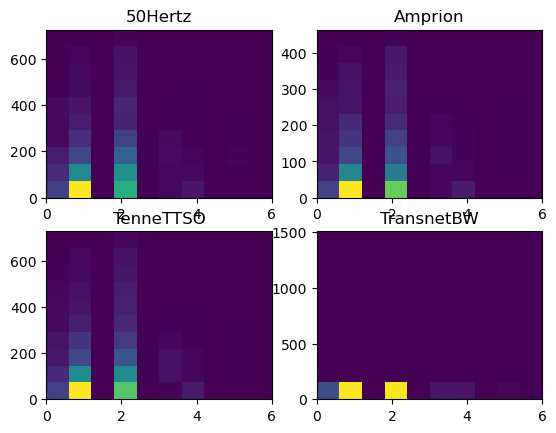

In [4]:
dependence('precipitation')

pressure
50Hertz -0.23282700529732067
Amprion -0.2483626781783035
TenneTTSO -0.22683033339058198
TransnetBW -0.23237459257655804


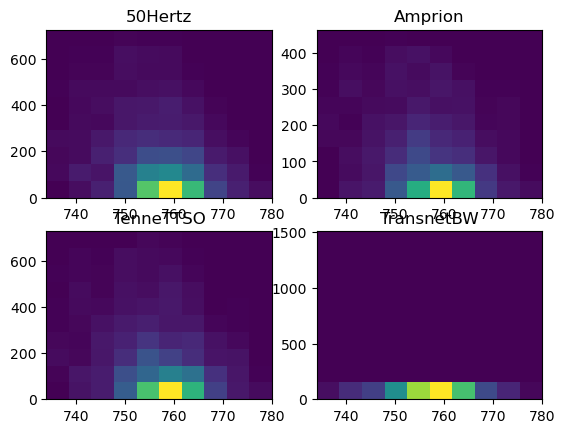

In [5]:
dependence('pressure')

wind
50Hertz 0.44831751676384757
Amprion 0.3412032925947586
TenneTTSO 0.4023173264041938
TransnetBW 0.2891185221947786


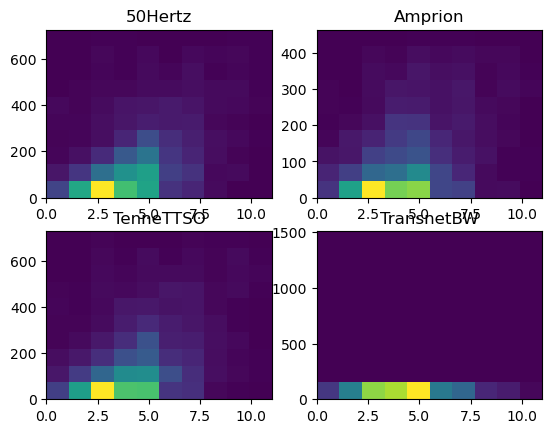

In [6]:
dependence('wind')

huminity
50Hertz 0.17755937548622922
Amprion 0.1870830140380926
TenneTTSO 0.16789009017185222
TransnetBW 0.1580017533617836


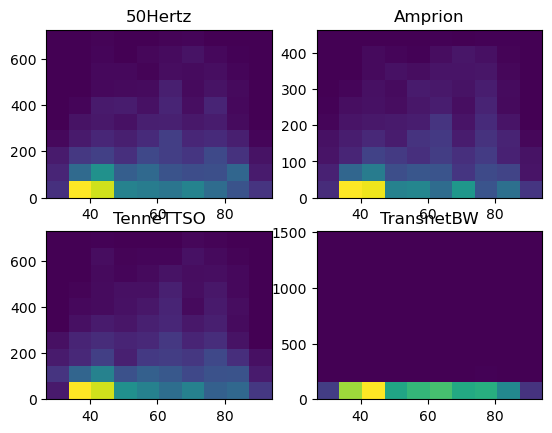

In [7]:
dependence('huminity')

day T
50Hertz -0.264605806795595
Amprion -0.27602336098737446
TenneTTSO -0.27785042217680705
TransnetBW -0.27707981781173835


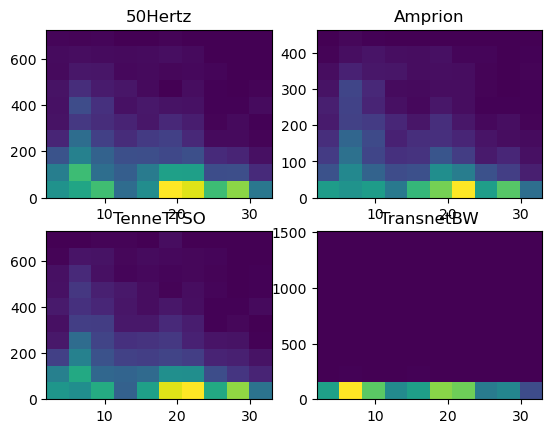

In [8]:
dependence('day T')

night T
50Hertz -0.17930231205300146
Amprion -0.20001242747626963
TenneTTSO -0.2024057066496116
TransnetBW -0.21692937912312016


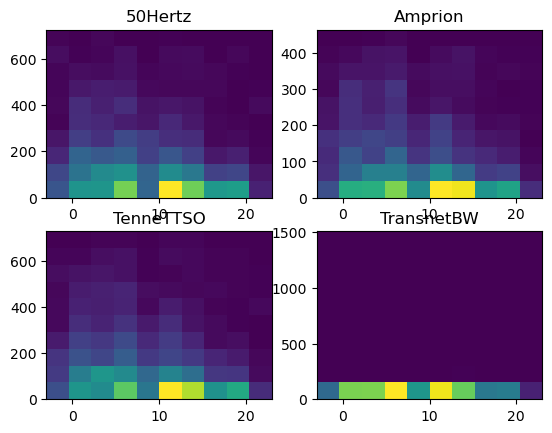

In [9]:
dependence('night T')

In [10]:
DATA

,dateTime,day T,night T,precipitation,pressure,huminity,wind,50Hertz,Amprion,TenneTTSO,TransnetBW
0,2019-12-09 00:00:00,8,6,2,743,66,7,185,87,108.46,24.11
1,2019-12-09 00:15:00,8,6,2,743,66,7,165,81,103.88,24.11
2,2019-12-09 00:30:00,8,6,2,743,66,7,161,81,102.55,21.66
3,2019-12-09 00:45:00,8,6,2,743,66,7,157,77,103.01,20.66
4,2019-12-09 01:00:00,8,6,2,743,66,7,144,77,100.02,19.25
...,...,...,...,...,...,...,...,...,...,...,...
38107,2020-08-31 22:45:00,22,15,2,757,49,3,33,17,29.11,2.44
38108,2020-08-31 23:00:00,22,15,2,757,49,3,36,17,28.80,2.44
38109,2020-08-31 23:15:00,22,15,2,757,49,3,35,17,26.86,3.22
38110,2020-08-31 23:30:00,22,15,2,757,49,3,35,16,23.83,4.00


In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import math

data2 = pd.read_csv('data.csv')
data = pd.read_csv('dataforpredict.csv')
datapredict = pd.read_csv('datanow.csv')



training_data_len = math.ceil(len(data) * .8)
training_data_len2 = math.ceil(len(data2) * .8)
training_data_len3 = math.ceil(len(datapredict) * .8)


 
#Splitting the dataset
train_data = data[:training_data_len].iloc[:,:] 
test_data = data[training_data_len:].iloc[:,:]

train_data2 = data2[:training_data_len2].iloc[:,:] 
test_data2 = data2[training_data_len2:].iloc[:,:]

test_data3 = datapredict[training_data_len3:].iloc[:,:][training_data_len3:].iloc[:,:]

In [12]:
# Selecting Open Price values
dataset_train = train_data['energy'].values 
# Reshaping 1D to 2D array
dataset_train = np.reshape(dataset_train, (-1,1)) 
dataset_train.shape

# Selecting Open Price values
dataset_train2 = train_data2['TenneTTSO'].values 
# Reshaping 1D to 2D array
dataset_train2 = np.reshape(dataset_train2, (-1,1)) 
dataset_train2.shape

(30490, 1)

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
# scaling dataset
scaled_train = scaler.fit_transform(dataset_train)
scaled_train2 = scaler.fit_transform(dataset_train2)

In [14]:
# Selecting Open Price values
dataset_test = test_data['energy'].values 
# Reshaping 1D to 2D array
dataset_test = np.reshape(dataset_test, (-1,1))  
# Normalizing values between 0 and 1
scaled_test = scaler.fit_transform(dataset_test)  

# Selecting Open Price values
dataset_test2 = test_data2['TenneTTSO'].values 
# Reshaping 1D to 2D array
dataset_test2 = np.reshape(dataset_test2, (-1,1))  
# Normalizing values between 0 and 1
scaled_test2 = scaler.fit_transform(dataset_test2)  


In [15]:
X_train = []
y_train = []
for i in range(50, len(scaled_train)):
    X_train.append(scaled_train[i-50:i, 0])
    y_train.append(scaled_train[i, 0])

X_train2 = []
y_train2 = []
for i in range(50, len(scaled_train2)):
    X_train2.append(scaled_train2[i-50:i, 0])
    y_train2.append(scaled_train2[i, 0])

In [16]:
X_test = []
y_test = []
for i in range(50, len(scaled_test)):
    X_test.append(scaled_test[i-50:i, 0])
    y_test.append(scaled_test[i, 0])
    
X_test2 = []
y_test2 = []
for i in range(50, len(scaled_test2)):
    X_test2.append(scaled_test2[i-50:i, 0])
    y_test2.append(scaled_test2[i, 0])
    
X_test3 = []
for i in range(50, len(test_data3)):
    X_test3.append(scaled_test3[i-50:i, 0])
    y_test3.append(scaled_test3[i, 0])

In [17]:
X_train, y_train = np.array(X_train), np.array(y_train)
 
#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))


X_train2, y_train2 = np.array(X_train2), np.array(y_train2)
 
#Reshaping
X_train2 = np.reshape(X_train2, (X_train2.shape[0], X_train2.shape[1],1))
y_train2 = np.reshape(y_train2, (y_train2.shape[0],1))


In [18]:
X_test, y_test = np.array(X_test), np.array(y_test)
 
#Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
y_test = np.reshape(y_test, (y_test.shape[0],1))

X_test2, y_test2 = np.array(X_test2), np.array(y_test2)
 
#Reshaping
X_test2 = np.reshape(X_test2, (X_test2.shape[0], X_test2.shape[1],1))
y_test2 = np.reshape(y_test2, (y_test2.shape[0],1))

X_test3= np.array(X_test2)

X_test3 = np.reshape(X_test3, (X_test3.shape[0], X_test3.shape[1],1))


In [19]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import GRU, Bidirectional
from keras.optimizers.legacy import SGD

from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [20]:
def all_model(X_train,y_train):    
    regressor = Sequential()

    # adding RNN layers and dropout regularization
    regressor.add(SimpleRNN(units = 50, 
                            activation = "tanh",
                            return_sequences = True,
                            input_shape = (X_train.shape[1],1)))
    regressor.add(Dropout(0.2))

    regressor.add(SimpleRNN(units = 50, 
                            activation = "tanh",
                            return_sequences = True))

    regressor.add(SimpleRNN(units = 50,
                            activation = "tanh",
                            return_sequences = True))

    regressor.add( SimpleRNN(units = 50))

    # adding the output layer
    regressor.add(Dense(units = 1,activation='sigmoid'))

    # compiling RNN
    regressor.compile(optimizer = SGD(learning_rate=0.01,
                                      decay=1e-6, 
                                      momentum=0.9, 
                                      nesterov=True), 
                      loss = "mean_squared_error")

    # fitting the model
    regressor.fit(X_train, y_train, epochs = 20, batch_size = 200)
    regressor.summary()
    regressorLSTM = Sequential()
 
    #Adding LSTM layers
    regressorLSTM.add(LSTM(50, 
                           return_sequences = True, 
                           input_shape = (X_train.shape[1],1)))
    regressorLSTM.add(LSTM(50, 
                           return_sequences = False))
    regressorLSTM.add(Dense(25))

    #Adding the output layer
    regressorLSTM.add(Dense(1))

    #Compiling the model
    regressorLSTM.compile(optimizer = 'adam',
                          loss = 'mean_squared_error',
                          metrics = ["accuracy"])

    #Fitting the model
    regressorLSTM.fit(X_train, 
                      y_train, 
                      batch_size = 200, 
                      epochs = 20)
    regressorLSTM.summary()
    regressorGRU = Sequential()
 
    # GRU layers with Dropout regularisation
    regressorGRU.add(GRU(units=50, 
                         return_sequences=True,
                         input_shape=(X_train.shape[1],1),
                         activation='tanh'))
    regressorGRU.add(Dropout(0.2))

    regressorGRU.add(GRU(units=50, 
                         return_sequences=True,
                         activation='tanh'))

    regressorGRU.add(GRU(units=50, 
                         return_sequences=True,
                         activation='tanh'))

    regressorGRU.add(GRU(units=50, 
                         activation='tanh'))

    # The output layer
    regressorGRU.add(Dense(units=1,
                           activation='relu'))
    # Compiling the RNN
    regressorGRU.compile(optimizer=SGD(learning_rate=0.01, 
                                       decay=1e-7, 
                                       momentum=0.9, 
                                       nesterov=False),
                         loss='mean_squared_error')

    # Fitting the data
    regressorGRU.fit(X_train,y_train,epochs=20,batch_size=200)
    regressorGRU.summary()
    
    return regressor, regressorLSTM, regressorGRU

In [21]:
regressor, regressorLSTM, regressorGRU = all_model(X_train,y_train)   
# predictions with X_test data
y_RNN = regressor.predict(X_test)
y_LSTM = regressorLSTM.predict(X_test)
y_GRU = regressorGRU.predict(X_test)
# scaling back from 0-1 to original
y_RNN_O = scaler.inverse_transform(y_RNN) 
y_LSTM_O = scaler.inverse_transform(y_LSTM) 
y_GRU_O = scaler.inverse_transform(y_GRU)

Epoch 1/20
2/2 [==============================] - 1s 31ms/step - loss: 0.1664
Epoch 2/20
2/2 [==============================] - 0s 64ms/step - loss: 0.0553
Epoch 3/20
2/2 [==============================] - 0s 63ms/step - loss: 0.0522
Epoch 4/20
2/2 [==============================] - 0s 64ms/step - loss: 0.0505
Epoch 5/20
2/2 [==============================] - 0s 63ms/step - loss: 0.0505
Epoch 6/20
2/2 [==============================] - 0s 63ms/step - loss: 0.0470
Epoch 7/20
2/2 [==============================] - 0s 48ms/step - loss: 0.0465
Epoch 8/20
2/2 [==============================] - 0s 66ms/step - loss: 0.0468
Epoch 9/20
2/2 [==============================] - 0s 63ms/step - loss: 0.0481
Epoch 10/20
2/2 [==============================] - 0s 45ms/step - loss: 0.0468
Epoch 11/20
2/2 [==============================] - 0s 62ms/step - loss: 0.0468
Epoch 12/20
2/2 [==============================] - 0s 47ms/step - loss: 0.0477
Epoch 13/20
2/2 [==============================] - 0s 48ms/st

 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 53901 (210.55 KB)
Trainable params: 53901 (210.55 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 1s 1s/step


In [22]:
regressor2, regressorLSTM2, regressorGRU2 = all_model(X_train2,y_train2)   
# predictions with X_test data
y_RNN2 = regressor2.predict(X_test2)
y_LSTM2 = regressorLSTM2.predict(X_test2)
y_GRU2 = regressorGRU2.predict(X_test2)
# scaling back from 0-1 to original
y_RNN_O2 = scaler.inverse_transform(y_RNN2) 
y_LSTM_O2 = scaler.inverse_transform(y_LSTM2) 
y_GRU_O2 = scaler.inverse_transform(y_GRU2)

Epoch 1/20
153/153 [==============================] - 18s 97ms/step - loss: 0.0124
Epoch 2/20
153/153 [==============================] - 15s 97ms/step - loss: 0.0034
Epoch 3/20
153/153 [==============================] - 15s 96ms/step - loss: 0.0025
Epoch 4/20
153/153 [==============================] - 13s 86ms/step - loss: 0.0021
Epoch 5/20
153/153 [==============================] - 13s 86ms/step - loss: 0.0018
Epoch 6/20
153/153 [==============================] - 13s 87ms/step - loss: 0.0017
Epoch 7/20
153/153 [==============================] - 14s 92ms/step - loss: 0.0016
Epoch 8/20
153/153 [==============================] - 13s 88ms/step - loss: 0.0015
Epoch 9/20
153/153 [==============================] - 14s 90ms/step - loss: 0.0015
Epoch 10/20
153/153 [==============================] - 13s 86ms/step - loss: 0.0014
Epoch 11/20
153/153 [==============================] - 12s 81ms/step - loss: 0.0013
Epoch 12/20
153/153 [==============================] - 12s 78ms/step - loss: 0.0013
E

                                                                 
 gru_5 (GRU)                 (None, 50, 50)            15300     
                                                                 
 gru_6 (GRU)                 (None, 50, 50)            15300     
                                                                 
 gru_7 (GRU)                 (None, 50)                15300     
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                                 
Total params: 53901 (210.55 KB)
Trainable params: 53901 (210.55 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
237/237 [==============================] - 7s 24ms/step


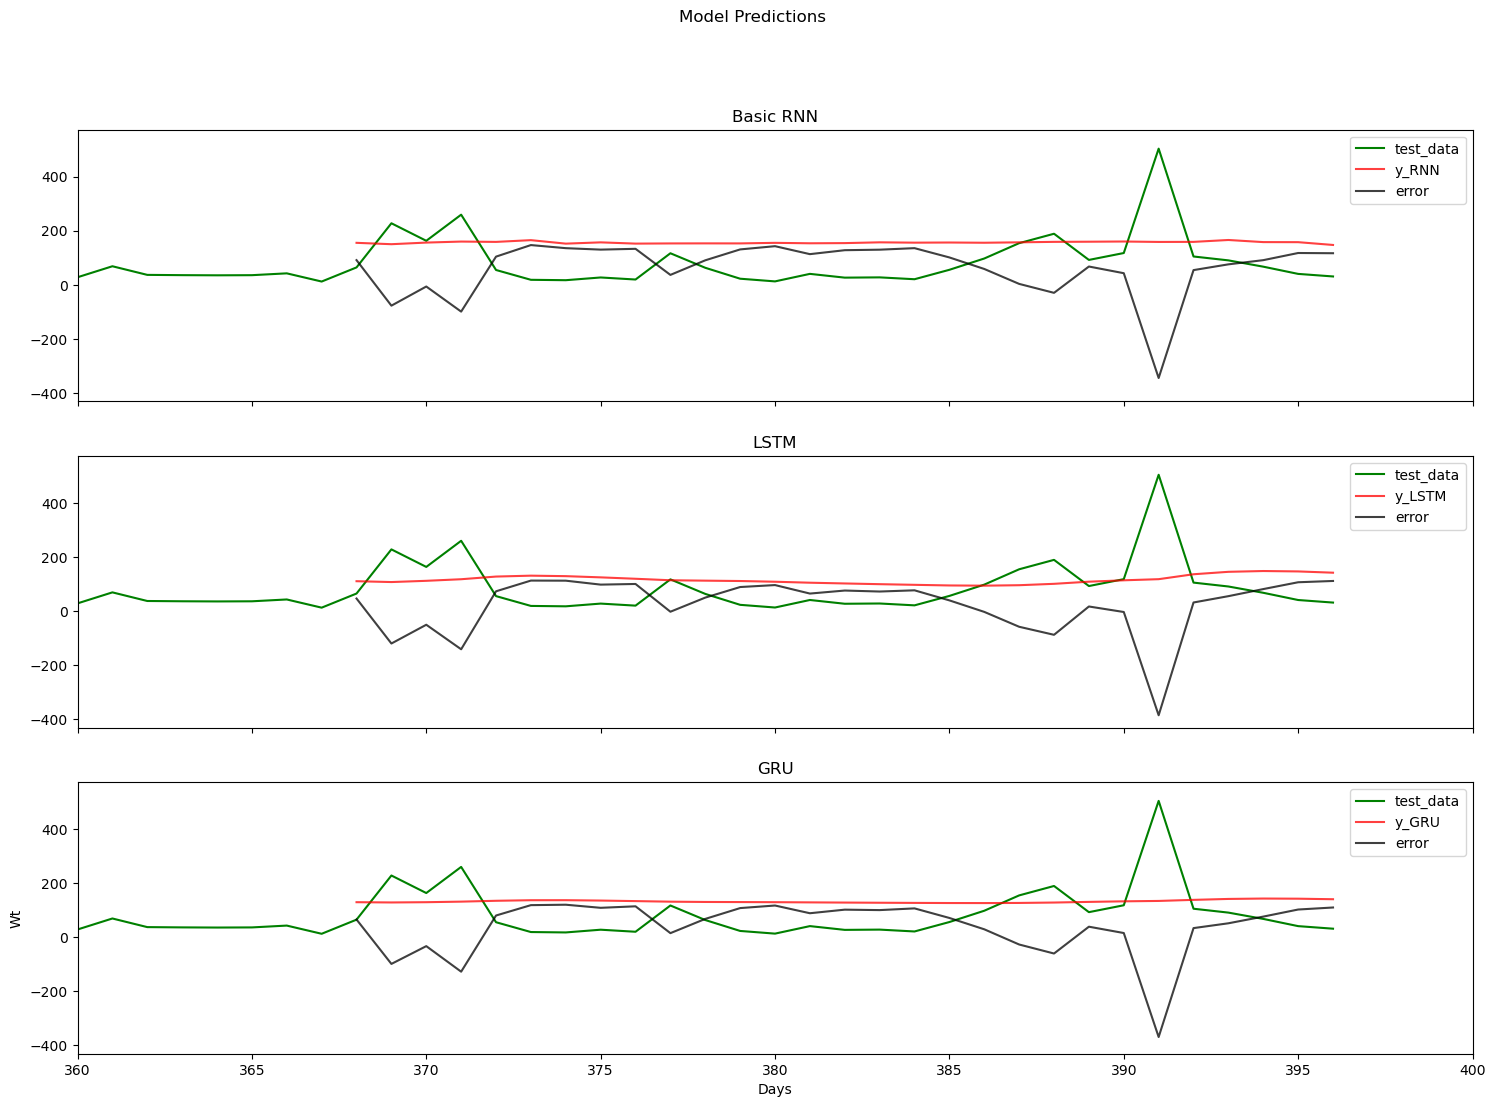

In [42]:
fig, axs = plt.subplots(3,figsize =(18,12),sharex=True, sharey=True)
fig.suptitle('Model Predictions')
 
#Plot for RNN predictions
# axs[0].plot(train_data.index[150:], train_data['energy'][150:], label = "train_data", color = "b")
axs[0].plot(test_data.index, test_data['energy'], label = "test_data", color = "g")
axs[0].plot(test_data.index[50:], y_RNN_O, label = "y_RNN", color = "red", alpha=0.75)
axs[0].plot(test_data.index[50:], y_RNN_O-np.array(test_data['energy'][50:]).reshape(29,1), label = "error", color = "black", alpha=0.75)
axs[0].legend()

axs[0].title.set_text("Basic RNN")
 
#Plot for LSTM predictions
# axs[1].plot(train_data.index[150:], train_data['energy'][150:], label = "train_data", color = "b")
axs[1].plot(test_data.index, test_data['energy'], label = "test_data", color = "g")
axs[1].plot(test_data.index[50:], y_LSTM_O, label = "y_LSTM", color = "red", alpha=0.75)
axs[1].plot(test_data.index[50:], y_LSTM_O-np.array(test_data['energy'][50:]).reshape(29,1), label = "error", color = "black", alpha=0.75)
axs[1].legend()
axs[1].title.set_text("LSTM")
 
#Plot for GRU predictions
# axs[2].plot(train_data.index[150:], train_data['energy'][150:], label = "train_data", color = "b")
axs[2].plot(test_data.index, test_data['energy'], label = "test_data", color = "g")
axs[2].plot(test_data.index[50:], y_GRU_O, label = "y_GRU", color = "red", alpha=0.75)
axs[2].plot(test_data.index[50:], y_GRU_O-np.array(test_data['energy'][50:]).reshape(29,1), label = "error", color = "black", alpha=0.75)
axs[2].legend()
plt.xlim(360,400)
axs[2].title.set_text("GRU")
 
plt.xlabel("Days")
plt.ylabel("Wt")
 
plt.show()

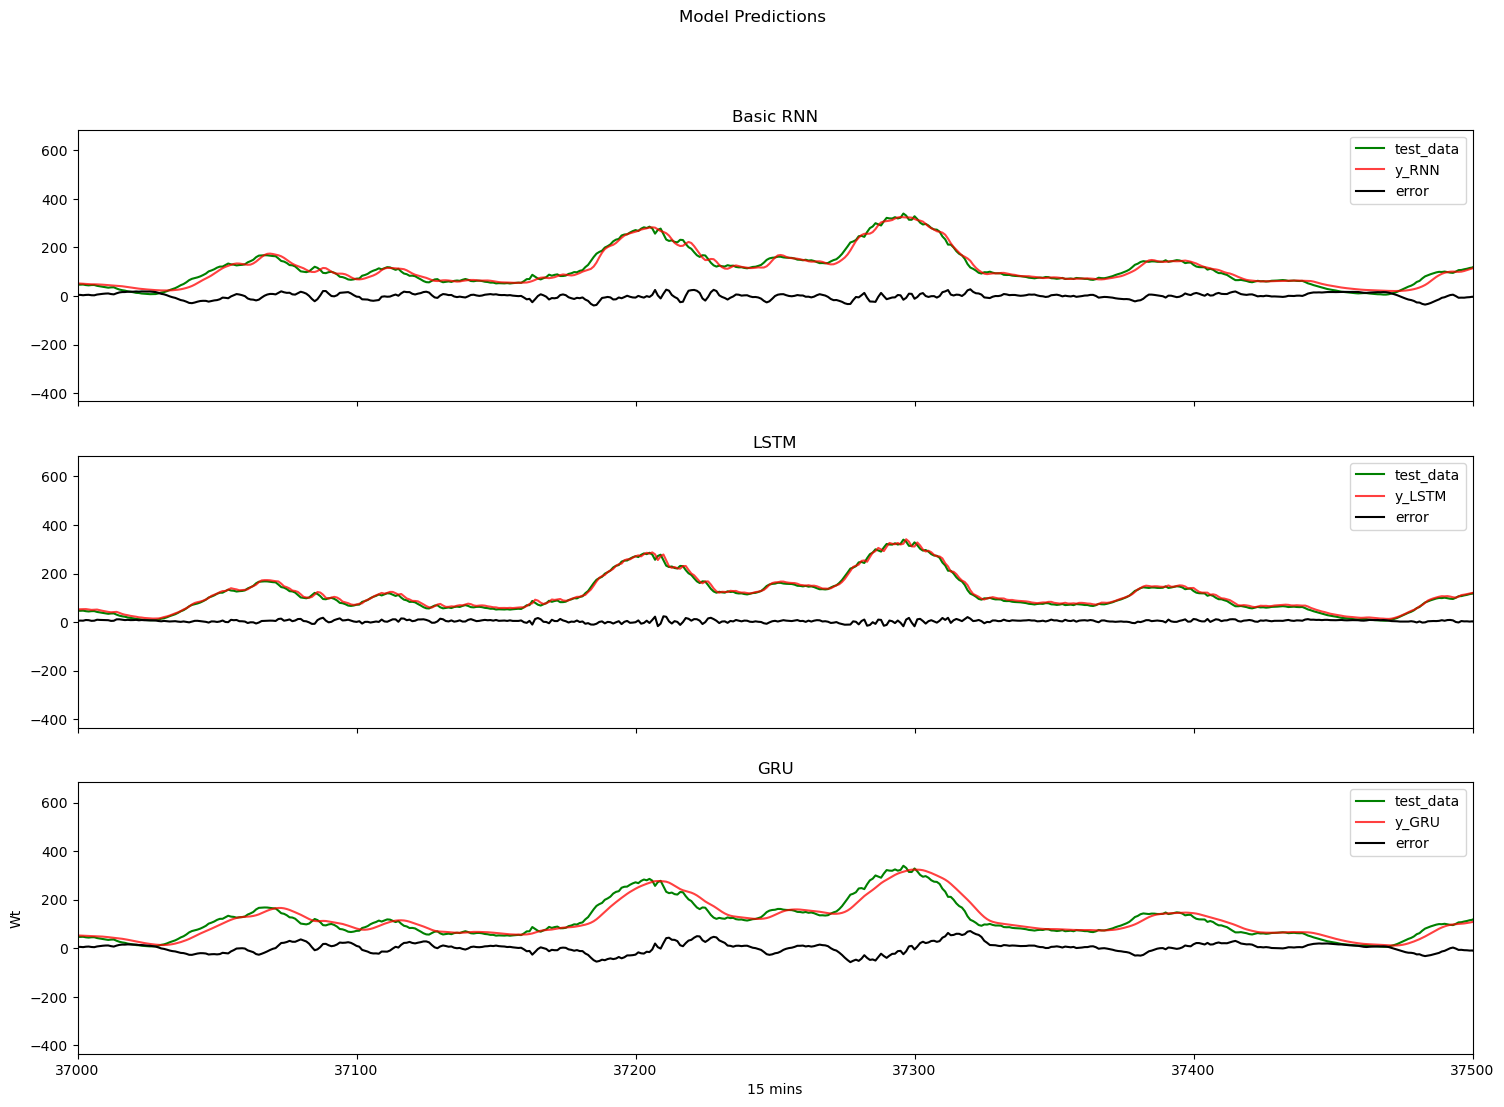

In [43]:
fig, axs = plt.subplots(3,figsize =(18,12),sharex=True, sharey=True)
fig.suptitle('Model Predictions')
 
#Plot for RNN predictions
# axs[0].plot(train_data2.index[150:], train_data2['TenneTTSO'][150:], label = "train_data", color = "b")
axs[0].plot(test_data2.index, test_data2['TenneTTSO'], label = "test_data", color = "g")
axs[0].plot(test_data2.index[50:], y_RNN_O2, label = "y_RNN", color = "red", alpha=0.75)
axs[0].plot(test_data2.index[50:], y_RNN_O2-np.array(test_data2['TenneTTSO'][50:]).reshape(7572,1), label = "error", color = "black")
axs[0].legend()

axs[0].title.set_text("Basic RNN")
 
#Plot for LSTM predictions
# axs[1].plot(train_data2.index[150:], train_data2['TenneTTSO'][150:], label = "train_data", color = "b")
axs[1].plot(test_data2.index, test_data2['TenneTTSO'], label = "test_data", color = "g")
axs[1].plot(test_data2.index[50:], y_LSTM_O2, label = "y_LSTM", color = "red", alpha=0.75)
axs[1].plot(test_data2.index[50:], y_LSTM_O2-np.array(test_data2['TenneTTSO'][50:]).reshape(7572,1), label = "error", color = "black")
axs[1].legend()
axs[1].title.set_text("LSTM")
 
#Plot for GRU predictions
# axs[2].plot(train_data2.index[150:], train_data2['TenneTTSO'][150:], label = "train_data", color = "b")
axs[2].plot(test_data2.index, test_data2['TenneTTSO'], label = "test_data", color = "g")
axs[2].plot(test_data2.index[50:], y_GRU_O2, label = "y_GRU", color = "red", alpha=0.75)
axs[2].plot(test_data2.index[50:], y_GRU_O2-np.array(test_data2['TenneTTSO'][50:]).reshape(7572,1), label = "error", color = "black")
axs[2].legend()
plt.xlim(37000,37500)
axs[2].title.set_text("GRU")
 
plt.xlabel("15 mins")
plt.ylabel("Wt")
 
plt.show()

In [25]:
py_RNN = regressor.predict(X_test3)
py_LSTM = regressorLSTM.predict(X_test3)
py_GRU = regressorGRU.predict(X_test3)
# scaling back from 0-1 to original
py_RNN_O = scaler.inverse_transform(py_RNN) 
py_LSTM_O = scaler.inverse_transform(py_LSTM) 
py_GRU_O = scaler.inverse_transform(py_GRU)

py_RNN2 = regressor2.predict(X_test3)
py_LSTM2 = regressorLSTM2.predict(X_test3)
py_GRU2 = regressorGRU2.predict(X_test3)
# scaling back from 0-1 to original
py_RNN_O2 = scaler.inverse_transform(py_RNN2) 
py_LSTM_O2 = scaler.inverse_transform(py_LSTM2) 
py_GRU_O2 = scaler.inverse_transform(py_GRU2)


237/237 [==============================] - 9s 38ms/step


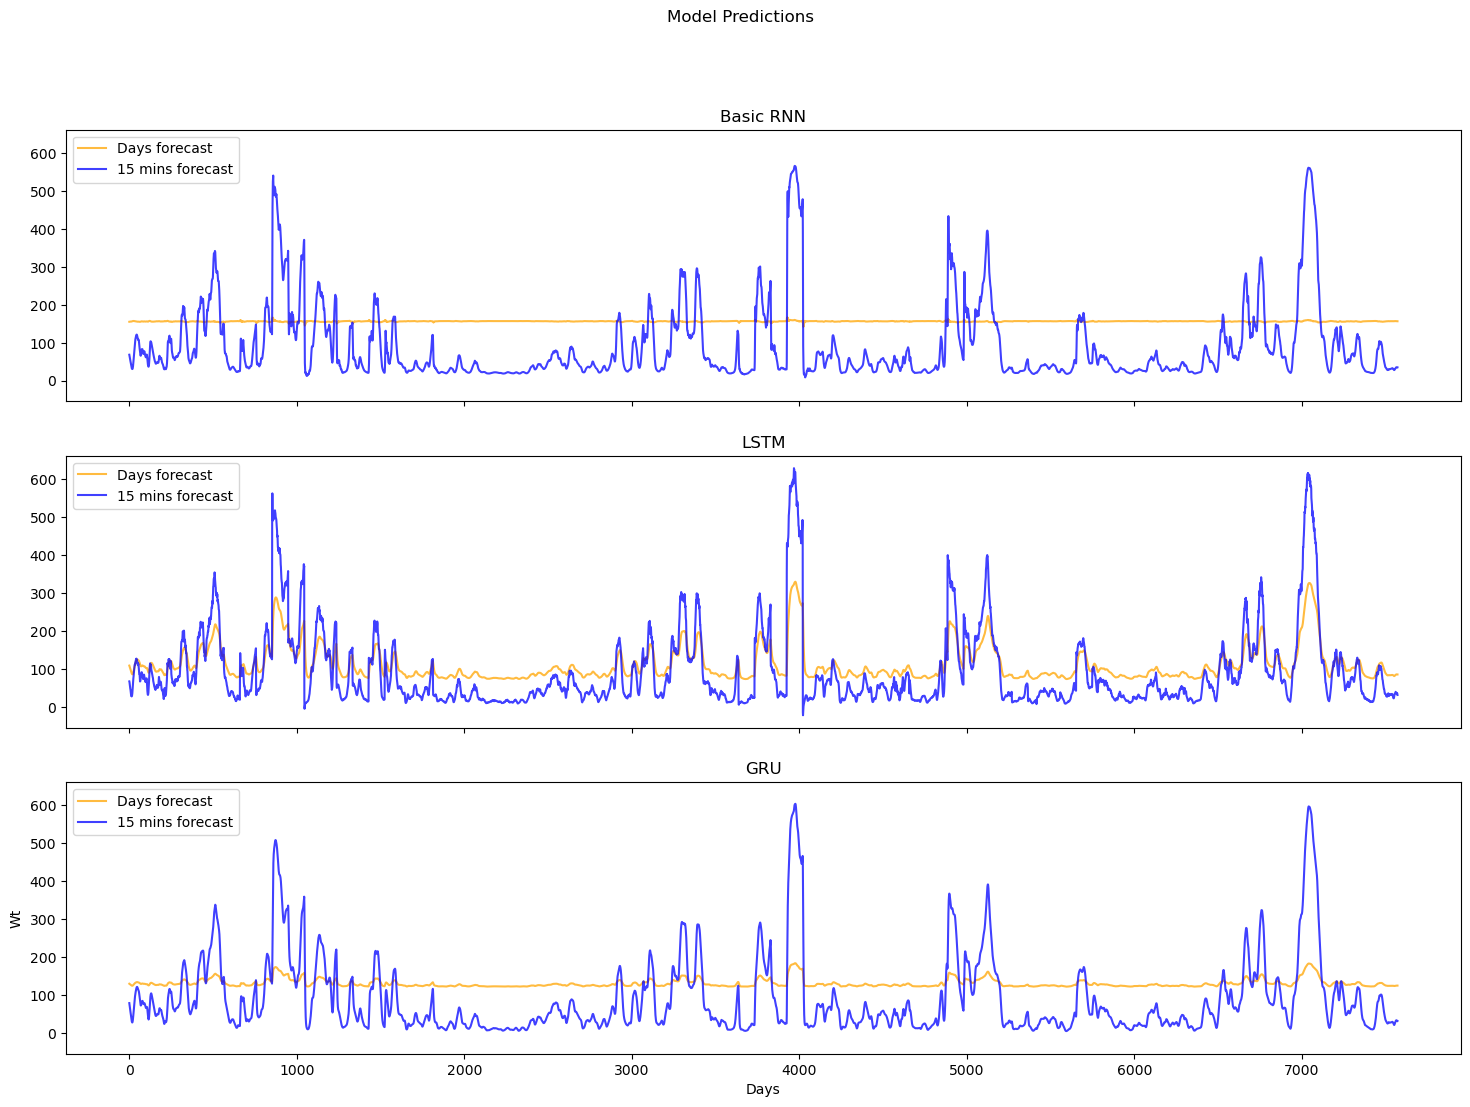

In [26]:
fig, axs = plt.subplots(3,figsize =(18,12),sharex=True, sharey=True)
fig.suptitle('Model Predictions')
 
#Plot for RNN predictions
axs[0].plot( py_RNN_O, label = "Days forecast", color = "orange", alpha=0.75)
axs[0].legend()

axs[0].title.set_text("Basic RNN")
 
#Plot for LSTM predictions
axs[1].plot( py_LSTM_O, label = "Days forecast", color = "orange", alpha=0.75)
axs[1].legend()
axs[1].title.set_text("LSTM")
 
#Plot for GRU predictions
axs[2].plot(py_GRU_O, label = "Days forecast", color = "orange", alpha=0.75)
axs[2].legend()
axs[2].title.set_text("GRU")
 
axs[0].plot( py_RNN_O2, label = "15 mins forecast", color = "blue", alpha=0.75)
axs[0].legend()

axs[0].title.set_text("Basic RNN")
 
#Plot for LSTM predictions
axs[1].plot( py_LSTM_O2, label = "15 mins forecast", color = "blue", alpha=0.75)
axs[1].legend()
axs[1].title.set_text("LSTM")
 
#Plot for GRU predictions
axs[2].plot(py_GRU_O2, label = "15 mins forecast", color = "blue", alpha=0.75)
axs[2].legend()
axs[2].title.set_text("GRU")

plt.xlabel("Days")
plt.ylabel("Wt")
 
plt.show()

In [27]:
import pickle
for i in ['regressor', 'regressorLSTM', 'regressorGRU','regressor2', 'regressorLSTM2', 'regressorGRU2']:
    with open(f'model {i}.pkl','wb') as f:
        exec(f"clf = {i}")
        pickle.dump(clf,f)

In [28]:
import pickle

for i in ['regressor', 'regressorLSTM', 'regressorGRU','regressor2', 'regressorLSTM2', 'regressorGRU2']:
    with open(f'model {i}.pkl', "rb") as file:
        deserialized_data = pickle.load(file)
        exec(f"{i} = deserialized_data")

AttributeError: 'SGD' object has no attribute 'build'

In [46]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
labels = ['RNN for days', 'RNN for 15 mins', "LSTM for days", "LSTM for 15 mins", 'GRU for days', 'GRU for 15 mins']
mse = []
r =[]
mse.append((mean_squared_error(test_data['energy'][50:],y_RNN_O)))
r.append(r2_score(test_data['energy'][50:],y_RNN_O))
mse.append(mean_squared_error(test_data2['TenneTTSO'][50:],y_RNN_O2))
r.append(r2_score(test_data2['TenneTTSO'][50:],y_RNN_O2))


In [47]:
mse.append(mean_squared_error(test_data['energy'][50:],y_LSTM_O))
r.append(r2_score(test_data['energy'][50:],y_LSTM_O))
mse.append(mean_squared_error(test_data2['TenneTTSO'][50:],y_LSTM_O2))
r.append(r2_score(test_data2['TenneTTSO'][50:],y_LSTM_O2))

In [48]:
mse.append(mean_squared_error(test_data['energy'][50:],y_GRU_O))
r.append(r2_score(test_data['energy'][50:],y_GRU_O))
mse.append(mean_squared_error(test_data2['TenneTTSO'][50:],y_GRU_O2))
r.append(r2_score(test_data2['TenneTTSO'][50:],y_GRU_O2))

In [59]:
pd.DataFrame(data=np.array((labels,mse,r)).T)

,0,1,2
0,RNN for days,13977.656383734726,-0.3730556901510973
1,RNN for 15 mins,409.2669194162858,0.9654257391822283
2,LSTM for days,11227.725655824504,-0.1029239935476347
3,LSTM for 15 mins,170.76747896961643,0.9855738172889477
4,GRU for days,11731.323197163507,-0.1523934790392265
5,GRU for 15 mins,669.5895602925693,0.9434340695518937
